In [84]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [85]:
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.rand(100,1)

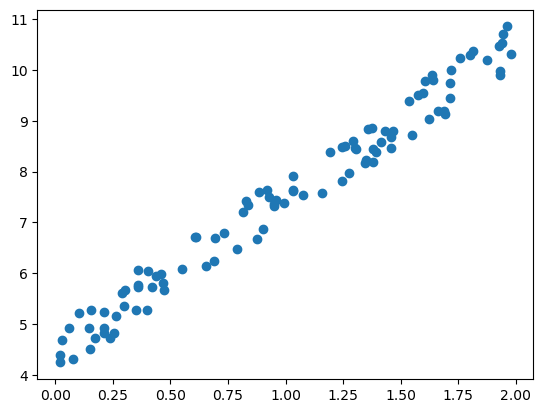

In [86]:
plt.scatter(X,Y)

In [87]:
#Using the closed form to compute theta(O) ---> O = (X^tX)^(-1) X^t y
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.transpose().dot(X_b)).dot(X_b.transpose()).dot(Y)

In [88]:
theta_best

array([[4.45436499],
       [3.04982281]])

In [89]:
results = theta_best.T.dot(X_b.T)

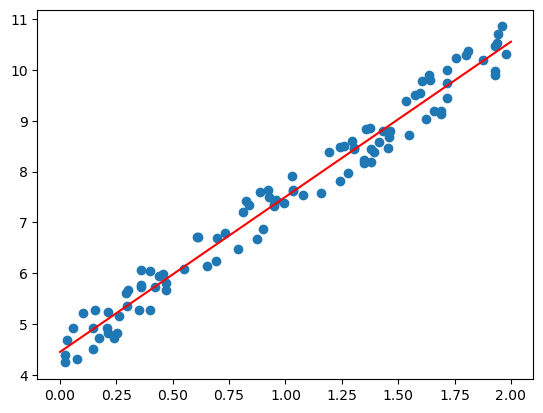

In [90]:
plt.scatter(X,Y)
plt.plot([0,2],[theta_best[0],theta_best[0]+2*theta_best[1]],'r-')

In [91]:
lreg = LinearRegression()
lreg.fit(X,Y)

LinearRegression()

In [92]:
print(lreg.coef_)
print(lreg.intercept_)

[[3.04982281]]
[4.45436499]


### Gradient Descent

In [93]:
def BatchGradDesc(X,Y,theta,iterations,etha): #the batch uses the whole training set in each iteration
    for i in range(iterations):
        gradient = 2.0/len(X)*X.T.dot(X.dot(theta)-Y)
        theta = theta - etha*gradient
    return theta

In [94]:
BatchGradDesc(X_b,Y,np.random.rand(2,1),1000,0.1)

array([[4.45436499],
       [3.04982281]])

In [95]:
def learningSchedule(t,t0,t1):
    return t0/(t+t1)

def StochGradDesc(X,Y,epochs,theta): #the stochastic uses only one instance in X in each iteration which makes it much faster in case the training set is large
    for i in range(epochs):
        for j in range(len(X)):
            random_sample = np.random.randint(0,len(X))
            X_new = X[random_sample:random_sample+1]
            Y_new = Y[random_sample:random_sample+1]
            gradient = 2*X_new.T.dot(X_new.dot(theta)-Y_new)
            theta = theta - learningSchedule(i*len(X)+j,5,50)*gradient
    return theta
        

In [96]:
StochGradDesc(X_b,Y,50,np.random.rand(2,1))

array([[4.45470298],
       [3.06377619]])

In [97]:
from sklearn.linear_model import SGDRegressor

In [98]:
sgdr = SGDRegressor(tol = 1e-3,max_iter=1000,penalty=None,eta0=0.1)

In [99]:
Y_n = Y.reshape(100)
sgdr.fit(X,Y_n)

SGDRegressor(eta0=0.1, penalty=None)

In [100]:
print(sgdr.intercept_,sgdr.coef_)

[4.46561866] [3.09429045]


### Polynomial Regression

In [132]:
m = 100
X = 6 * np.random.rand(m,1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

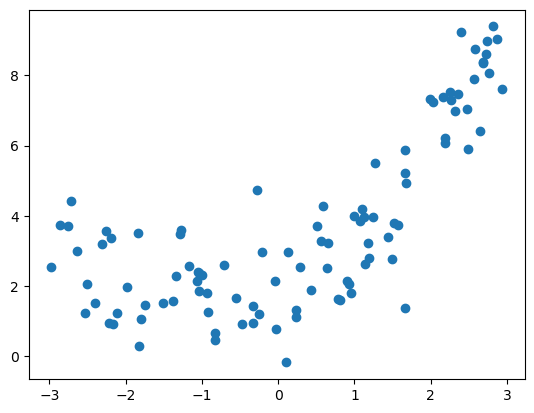

In [107]:
plt.scatter(X,Y)

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [115]:
#now we apply a lineal reagreession model
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y)

LinearRegression()

In [116]:
lin_reg.intercept_, lin_reg.coef_

(array([1.92438092]), array([[0.93641075, 0.50902634]]))

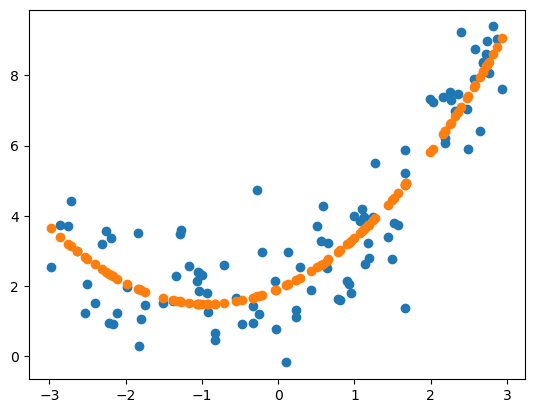

In [126]:
plt.scatter(X,Y)
new_coefs = np.c_[lin_reg.intercept_, lin_reg.coef_]
X_poly_new = np.c_[np.ones((len(X_poly),1)),X_poly]
Y_new = new_coefs.dot(X_poly_new.T)
plt.scatter(X,Y_new.T)

In [127]:
poly_reg_new = PolynomialFeatures(degree=2)

In [128]:
poly_reg_new.fit(X)

PolynomialFeatures()

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_error = []
    val_error = []
    for i in range(len(X)):
        model.fit(X_train[:i+1],y_train[:i+1])
        y_train_predict = model.predict(X_train[:i+1])
        y_val_predict = model.predict(X_val)
        training_error = mean_squared_error(y_train[:i+1],y_train_predict)
        validation_error = mean_squared_error(y_val,y_val_predict)
        train_error.append(np.sqrt(training_error))
        val_error.append(np.sqrt(validation_error))      
    plt.xlim(0,80)
    plt.ylim(0,3)
    plt.plot(train_error,'r*-', label = 'Training Error')
    plt.plot(val_error,'b-', label = 'Validation Error')
    plt.legend()
    
    

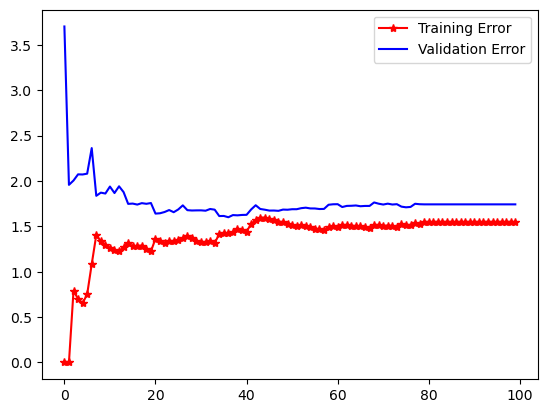

In [158]:
plot_learning_curves(lin_reg,X,Y)

In [166]:
full_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('linear',LinearRegression())])

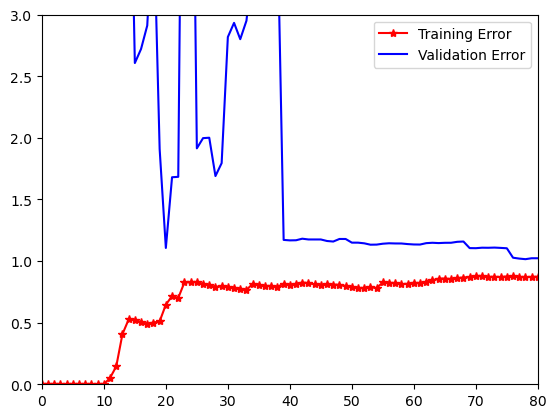

In [169]:
plot_learning_curves(full_pipeline,X,Y)